In [45]:
from transformers import pipeline, DistilBertTokenizerFast
import json
from datasets import load_dataset
import pandas as pd
import torch
import numpy as np
import shap
from utils import unpack_dataset, SquadDS, add_answer_end, define_token_position, load_model, f, f_end,f_start, out_names
from model import train, test

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

sns.set_theme()


In [46]:
with open('model/metrics1.json','r') as file:
    data = json.load(file)


The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


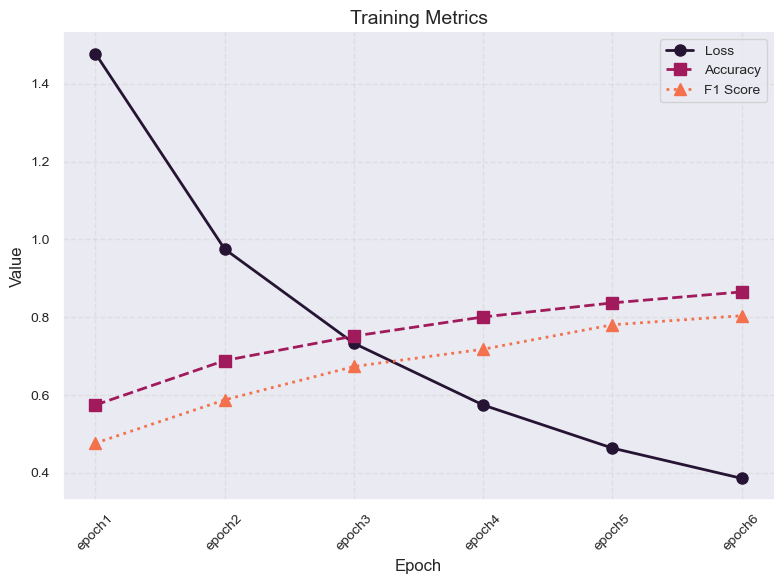

In [47]:
# Extract the metric values
epochs = list(data['train'].keys())
loss_values = [data['train'][epoch]['loss'] for epoch in epochs]
accuracy_values = [data['train'][epoch]['accuracy'] for epoch in epochs]
f1_score_values = [data['train'][epoch]['f1_score'] for epoch in epochs]


# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create a rocket color map
rocket_cmap = cm.get_cmap('rocket')

# Plot the loss
ax.plot(epochs, loss_values, marker='o', linestyle='-', linewidth=2, markersize=8, label='Loss', color=rocket_cmap(0.1))

# Plot the accuracy
ax.plot(epochs, accuracy_values, marker='s', linestyle='--', linewidth=2, markersize=8, label='Accuracy', color=rocket_cmap(0.4))

# Plot the F1 score
ax.plot(epochs, f1_score_values, marker='^', linestyle=':', linewidth=2, markersize=8, label='F1 Score', color=rocket_cmap(0.7))

# Add labels and title to the plot
ax.set_xlabel('Epoch', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Training Metrics', fontsize=14)

# Customize the tick labels
ax.tick_params(axis='x', labelrotation=45, labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Add gridlines
ax.grid(color='lightgray', linestyle='--', alpha=0.5)

# Add legend
ax.legend(fontsize=10)

# Remove the plot spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust the plot layout
plt.tight_layout()

# Display the plot
plt.show()

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


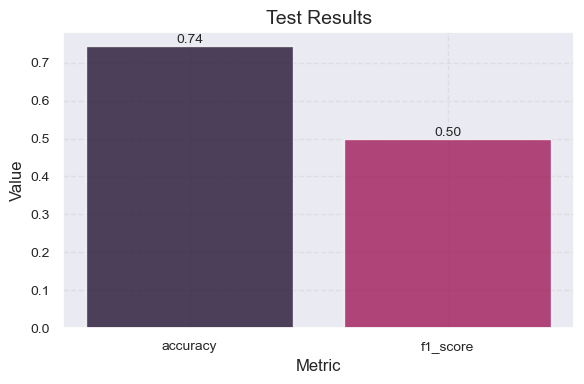

In [48]:
# Extract the metric names and values
metrics = list(data['test'].keys())
values = list(data['test'].values())

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(6, 4))

# Create a rocket color map
rocket_cmap = cm.get_cmap('rocket')

# Create a bar chart with colored bars
bars = ax.bar(metrics, values, color=rocket_cmap([0.1, 0.4]), alpha=0.8)

# Add labels and title to the plot
ax.set_xlabel('Metric', fontsize=12)
ax.set_ylabel('Value', fontsize=12)
ax.set_title('Test Results', fontsize=14)

# Customize the tick labels
ax.tick_params(axis='x', labelrotation=0, labelsize=10)
ax.tick_params(axis='y', labelsize=10)

# Add gridlines
ax.grid(color='lightgray', linestyle='--', alpha=0.5)

# Add value labels on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

# Adjust the plot layout
plt.tight_layout()

# Display the plot
plt.show()

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


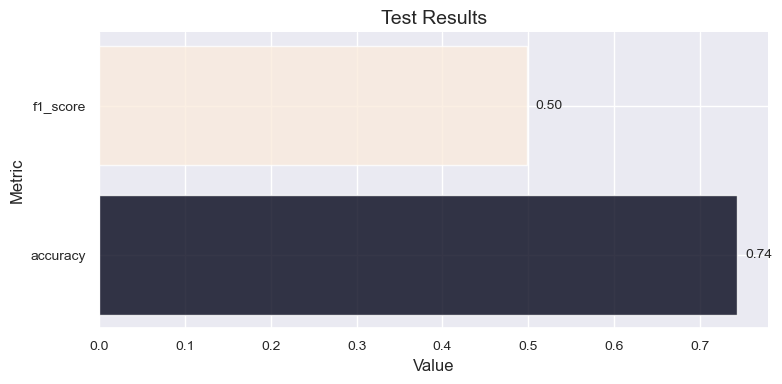

In [49]:
# Extract the metric names and values
metrics = list(data['test'].keys())
values = list(data['test'].values())

# Create a gradient color map
gradient_cmap = cm.get_cmap('rocket')

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 4))

# Create a horizontal bar chart with gradient colors
bars = ax.barh(metrics, values, color=gradient_cmap(np.linspace(0, 1, len(metrics))), alpha=0.8)

# Add labels to the bars
for i, bar in enumerate(bars):
    ax.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2, f'{values[i]:.2f}', ha='left', va='center', fontsize=10)

# Add labels and title to the plot
ax.set_xlabel('Value', fontsize=12)
ax.set_ylabel('Metric', fontsize=12)
ax.set_title('Test Results', fontsize=14)

# Customize the tick labels
ax.tick_params(axis='both', labelsize=10)

# Remove the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust the plot layout
plt.tight_layout()

# Display the plot
plt.show()